In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

C:\Users\prabhakar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [95]:
df = pd.read_csv('german_credit_data.csv')

# Based on the given features, classify the person as a good risk or bad risk.
Guidelines
1. Explore and prepare the data
2. Create training and testing data for the model
5
3. Train and test the model using any three or more classification algorithms and compare
accuracies between all.
4. Show or visualize the output.


In [96]:
df.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good


In [97]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [98]:
df.shape

(1000, 10)

In [99]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [100]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [101]:
df.replace({'NaN' : 0,'little' : 1, 'quite rich' : 2, 'rich' : 3, 'moderate' : 4}, inplace = True)

In [102]:
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,1.0,1169,6,radio/TV,good
1,22,female,2,own,1.0,4.0,5951,48,radio/TV,bad
2,49,male,1,own,1.0,NaN,2096,12,education,good


In [103]:
df['Checking account'].unique()

array([ 1.,  4., nan,  3.])

In [104]:
df.Purpose.unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [105]:
purpose = df['Purpose']
purpose = pd.get_dummies(purpose, drop_first = True)
purpose.head()


,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [106]:
df.Risk.unique()

array(['good', 'bad'], dtype=object)

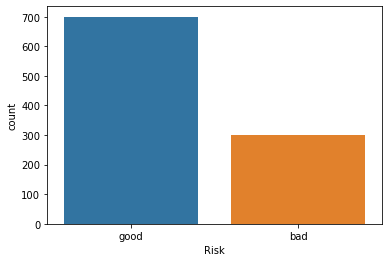

In [107]:
sns.countplot(df['Risk'])

In [108]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [109]:
risk = df['Risk']
risk = pd.get_dummies(risk, drop_first = True)
risk.head()

,good
0,1
1,0
2,1
3,1
4,0


In [110]:
sex = df['Sex']
sex = pd.get_dummies(sex, drop_first = True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,1


In [111]:
df.Housing.unique()

array(['own', 'free', 'rent'], dtype=object)

In [112]:
housing = df['Housing']
housing = pd.get_dummies(housing, drop_first = True)
housing.head()

,own,rent
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0


In [113]:
df = pd.concat([df,sex,risk,purpose,housing], axis = 1)

In [114]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,good,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,own,rent
0,67,male,2,own,NaN,1.0,1169,6,radio/TV,good,...,1,0,0,0,0,1,0,0,1,0
1,22,female,2,own,1.0,4.0,5951,48,radio/TV,bad,...,0,0,0,0,0,1,0,0,1,0
2,49,male,1,own,1.0,NaN,2096,12,education,good,...,1,0,0,1,0,0,0,0,1,0
3,45,male,2,free,1.0,1.0,7882,42,furniture/equipment,good,...,1,0,0,0,1,0,0,0,0,0
4,53,male,2,free,1.0,1.0,4870,24,car,bad,...,0,1,0,0,0,0,0,0,0,0


In [115]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'male', 'good', 'car',
       'domestic appliances', 'education', 'furniture/equipment', 'radio/TV',
       'repairs', 'vacation/others', 'own', 'rent'],
      dtype='object')

In [116]:
df.drop(['Sex','Risk','Purpose', 'Housing'], axis = 1)

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,male,good,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,own,rent
0,67,2,NaN,1.0,1169,6,1,1,0,0,0,0,1,0,0,1,0
1,22,2,1.0,4.0,5951,48,0,0,0,0,0,0,1,0,0,1,0
2,49,1,1.0,NaN,2096,12,1,1,0,0,1,0,0,0,0,1,0
3,45,2,1.0,1.0,7882,42,1,1,0,0,0,1,0,0,0,0,0
4,53,2,1.0,1.0,4870,24,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1.0,NaN,1736,12,0,1,0,0,0,1,0,0,0,1,0
996,40,3,1.0,1.0,3857,30,1,1,1,0,0,0,0,0,0,1,0
997,38,2,1.0,NaN,804,12,1,1,0,0,0,0,1,0,0,1,0
998,23,2,1.0,1.0,1845,45,1,0,0,0,0,0,1,0,0,0,0


In [117]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'male', 'good', 'car',
       'domestic appliances', 'education', 'furniture/equipment', 'radio/TV',
       'repairs', 'vacation/others', 'own', 'rent'],
      dtype='object')

In [118]:
df1= df(['Age', 'Job', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'male', 'good', 'car',
       'domestic appliances', 'education', 'furniture/equipment', 'radio/TV',
       'repairs', 'vacation/others', 'own', 'rent'], axis = 1)

TypeError: 'DataFrame' object is not callable

In [119]:
df1 = df.drop(['Sex', 'Housing', 'Purpose', 'Risk',], inplace = True, axis = 1)

In [120]:
df1

In [121]:
df.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,male,good,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,own,rent
0,67,2,NaN,1.0,1169,6,1,1,0,0,0,0,1,0,0,1,0
1,22,2,1.0,4.0,5951,48,0,0,0,0,0,0,1,0,0,1,0
2,49,1,1.0,NaN,2096,12,1,1,0,0,1,0,0,0,0,1,0
3,45,2,1.0,1.0,7882,42,1,1,0,0,0,1,0,0,0,0,0
4,53,2,1.0,1.0,4870,24,1,0,1,0,0,0,0,0,0,0,0


In [122]:
df.apply(lambda x : x.fillna(x.mean(),axis = 0))

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,male,good,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,own,rent
0,67,2,1.572827,1.000000,1169,6,1,1,0,0,0,0,1,0,0,1,0
1,22,2,1.000000,4.000000,5951,48,0,0,0,0,0,0,1,0,0,1,0
2,49,1,1.000000,2.539604,2096,12,1,1,0,0,1,0,0,0,0,1,0
3,45,2,1.000000,1.000000,7882,42,1,1,0,0,0,1,0,0,0,0,0
4,53,2,1.000000,1.000000,4870,24,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1.000000,2.539604,1736,12,0,1,0,0,0,1,0,0,0,1,0
996,40,3,1.000000,1.000000,3857,30,1,1,1,0,0,0,0,0,0,1,0
997,38,2,1.000000,2.539604,804,12,1,1,0,0,0,0,1,0,0,1,0
998,23,2,1.000000,1.000000,1845,45,1,0,0,0,0,0,1,0,0,0,0


In [123]:
df.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,male,good,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,own,rent
0,67,2,NaN,1.0,1169,6,1,1,0,0,0,0,1,0,0,1,0
1,22,2,1.0,4.0,5951,48,0,0,0,0,0,0,1,0,0,1,0
2,49,1,1.0,NaN,2096,12,1,1,0,0,1,0,0,0,0,1,0
3,45,2,1.0,1.0,7882,42,1,1,0,0,0,1,0,0,0,0,0
4,53,2,1.0,1.0,4870,24,1,0,1,0,0,0,0,0,0,0,0


In [124]:
df.columns

Index(['Age', 'Job', 'Saving accounts', 'Checking account', 'Credit amount',
       'Duration', 'male', 'good', 'car', 'domestic appliances', 'education',
       'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others', 'own',
       'rent'],
      dtype='object')

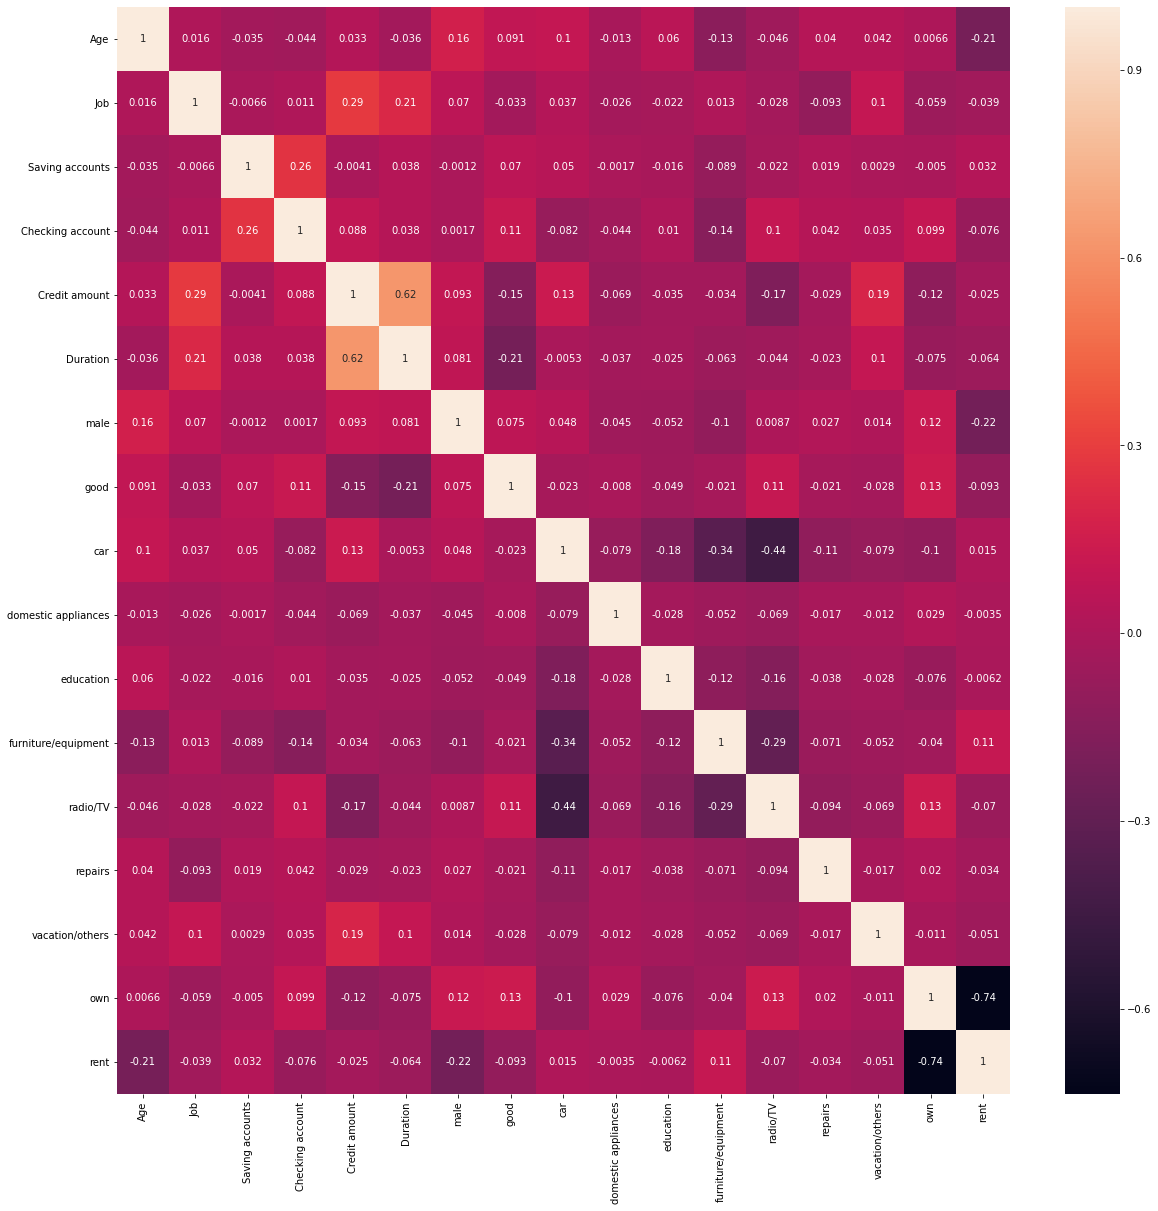

In [125]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

In [128]:
df['Saving accounts'].fillna(df['Saving accounts'].mean(), inplace = True)

In [130]:
df['Checking account'].fillna(df['Checking account'].mean(), inplace = True)

In [131]:
df.isna().sum()

Age                    0
Job                    0
Saving accounts        0
Checking account       0
Credit amount          0
Duration               0
male                   0
good                   0
car                    0
domestic appliances    0
education              0
furniture/equipment    0
radio/TV               0
repairs                0
vacation/others        0
own                    0
rent                   0
dtype: int64

In [132]:
x = df.loc[:,['Age', 'Job', 'Saving accounts', 'Checking account', 'Credit amount',
       'Duration', 'male', 'car', 'domestic appliances', 'education',
       'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others', 'own',
       'rent']]

In [133]:
x.shape

(1000, 16)

In [134]:
y = df.iloc[:,7]

In [135]:
y.shape

(1000,)

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [138]:
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(700, 16)
(300, 16)
(700,)
(300,)


In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
lr = LogisticRegression()
model = lr.fit(x_tr,y_tr)
lr_pred = model.predict(x_te)
accuracy_score(y_te,lr_pred)

C:\Users\prabhakar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6966666666666667

In [141]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf = RandomForestClassifier()
model_rf = rf.fit(x_tr,y_tr)
rf_pred = model.predict(x_te)
accuracy_score(y_te,rf_pred)

C:\Users\prabhakar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6966666666666667

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_dt = dt.fit(x_tr,y_tr)
dt_pred = model_dt.predict(x_te)
accuracy_score(y_te,dt_pred)

0.7066666666666667

In [157]:
dt2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_dt_sc = dt2.fit(x_tr_sc,y_tr)
dt_pred_sc = model_dt_sc.predict(x_te_sc)
accuracy_score(y_te,dt_pred_sc)

0.7066666666666667

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn = KNeighborsClassifier()
model_knn = knn.fit(x_tr,y_tr)
knn_pred = model_knn.predict(x_te)
accuracy_score(y_te,knn_pred)

0.6466666666666666

In [155]:
knn2 = KNeighborsClassifier()
model_knn_sc = knn2.fit(x_tr_sc,y_tr)
knn_pred_sc = model_knn.predict(x_te_sc)
accuracy_score(y_te,knn_pred_sc)

0.6966666666666667

In [148]:
from sklearn.svm import SVC

In [151]:
svm = SVC()
model_svm = svm.fit(x_tr,y_tr)
svm_pred = model_svm.predict(x_te)
accuracy_score(y_te,svm_pred)

C:\Users\prabhakar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6966666666666667

In [154]:
svm2 = SVC()
model_svm_sc = svm2.fit(x_tr_sc,y_tr)
svm_pred_sc = model_svm.predict(x_te_sc)
accuracy_score(y_te,svm_pred_sc)

0.7166666666666667

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_tr_sc = scaler.fit_transform(x_tr)
x_te_sc = scaler.fit_transform(x_te)

In [159]:
print(classification_report(y_te,svm_pred_sc))

              precision    recall  f1-score   support

           0       0.64      0.15      0.25        91
           1       0.72      0.96      0.83       209

    accuracy                           0.72       300
   macro avg       0.68      0.56      0.54       300
weighted avg       0.70      0.72      0.65       300



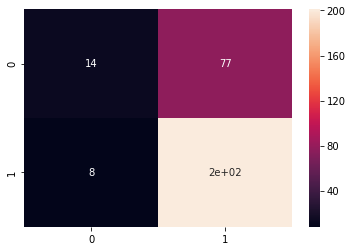

In [160]:
cm = confusion_matrix(y_te,svm_pred_sc)
sns.heatmap(cm, annot = True)

In [162]:
test_userID = x_te['Age']

In [163]:
ultimate_result = pd.concat([test_userID, y_te], axis = 1)
ultimate_result['predicted result'] = svm_pred_sc
 
print(ultimate_result)

     Age  good  predicted result
521   24     0                 1
737   35     1                 1
740   32     1                 1
660   23     1                 1
411   35     1                 1
..   ...   ...               ...
468   26     1                 1
935   30     0                 1
428   20     1                 1
7     35     1                 1
155   20     0                 1

[300 rows x 3 columns]
